<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/MSFT_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **基本操作**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 資料型態轉換
list_data = [ [1, 2], [3, 4] ]

# from list to tensor
data_to_tensor = torch.tensor(list_data)

# from list to np_array
data_to_array = np.array(list_data)

# from np_array to tensor
array_to_tensor = torch.from_numpy(data_to_array)

#
print(f"Type: {type(list_data)}\n{list_data}")
print("\nList to tensor")
print(f"Type: {type(data_to_tensor)}\n{data_to_tensor}")
print("\nList to array")
print(f"Type: {type(data_to_array)}\n{data_to_array}")
print("\nArray to tensor")
print(f"Type: {type(array_to_tensor)}\n{array_to_tensor}")

Type: <class 'list'>
[[1, 2], [3, 4]]

List to tensor
Type: <class 'torch.Tensor'>
tensor([[1, 2],
        [3, 4]])

List to array
Type: <class 'numpy.ndarray'>
[[1 2]
 [3 4]]

Array to tensor
Type: <class 'torch.Tensor'>
tensor([[1, 2],
        [3, 4]])


In [3]:
# 複製已存在的 tensor shape
torch.ones_like(array_to_tensor), torch.zeros_like(array_to_tensor)

(tensor([[1, 1],
         [1, 1]]),
 tensor([[0, 0],
         [0, 0]]))

In [4]:
# 指定 tensor shape, random data
SHAPE = (2, 3)

rand_tensor = torch.rand(SHAPE)
rand_tensor

tensor([[0.0731, 0.6113, 0.2498],
        [0.0284, 0.0238, 0.5699]])

In [5]:
# 檢視 tensor 相關資訊
print(rand_tensor.shape)
print(rand_tensor.dtype)
print(rand_tensor.device)

torch.Size([2, 3])
torch.float32
cpu


In [6]:
# 設置 tensor 運作於何種裝置上
device = "cude" if torch.cuda.is_available() else "cpu"

In [7]:
# 基本 tensor 操作_1
list_1 = [ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16] ]
tensor_1 = torch.tensor(list_1)

print(tensor_1)
print(f"First row:\n{tensor_1[0]}\n")
print(f"First column:\n{tensor_1[:, 0]}\n")
print(f"Last column:\n{tensor_1[..., -1]}")

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
First row:
tensor([1, 2, 3, 4])

First column:
tensor([ 1,  5,  9, 13])

Last column:
tensor([ 4,  8, 12, 16])


In [8]:
# 基本 tensor 操作_2
tensor_2 = torch.rand((2, 3))

# 水平整合
h = torch.cat([tensor_2, tensor_2, tensor_2], dim=1)
h

# 垂直整合
v = torch.cat([tensor_2, tensor_2, tensor_2], dim=0)
v

tensor([[0.9883, 0.1873, 0.5952],
        [0.3067, 0.8213, 0.9153],
        [0.9883, 0.1873, 0.5952],
        [0.3067, 0.8213, 0.9153],
        [0.9883, 0.1873, 0.5952],
        [0.3067, 0.8213, 0.9153]])

In [9]:
# 基本 tensor 操作_3 (乘除, 注意shape)
torch.manual_seed(42)
tensor_3 = torch.rand((2, 3))

result_1 = tensor_3 @ tensor_3.T

result_2 = torch.matmul(tensor_3, tensor_3.T)
result_2

tensor([[1.7622, 1.4337],
        [1.4337, 1.4338]])

# **Dataset & Dataloader**
1. **Dataset**: data, label
2. **Dataloader**: iterable
3. **Fashion-MNIST** as example


In [10]:
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

## Dataset
1. Dataset
2. Show image from Dataset

In [11]:
# 訓練資料集, 測試資料集
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()) # 將每個圖像轉換成tensor形式, 並將數值轉換至 0 - 1 之間

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 16409646.21it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 323634.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5538303.54it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20524978.13it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [12]:
# 了解 Dataset 資料結構
# 每組資料 -> (image, label)
train_dataset[0]

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


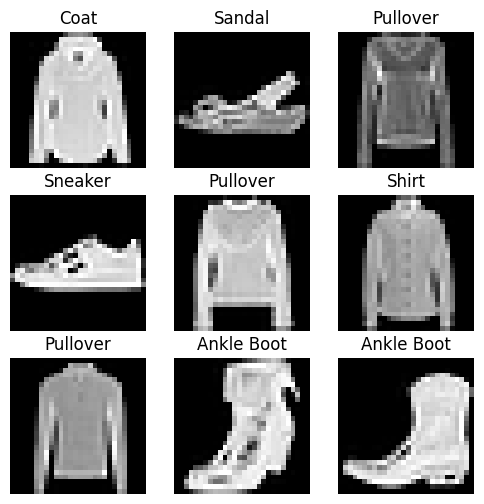

In [13]:
# 從dataset 中, 隨機顯示10張圖片

figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3

for i in range(1, 10):
    # 隨機取train_dataset長度的數字，size一維化, item()轉為Python整數
    sample_index = torch.randint(len(train_dataset), size=(1,)).item()
    image, label = train_dataset[sample_index]

    figure.add_subplot(cols, rows, i)
    plt.title(labels_map[label])
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis("off")

In [14]:
# # 同效果
# plt.figure(figsize=(6,6))
# cols, rows = 3, 3

# for i in range(1, 10):
#     # 隨機取train_dataset長度的數字，size一維化, item()轉為Python整數
#     sample_index = torch.randint(len(train_dataset), size=(1,)).item()
#     image, label = train_dataset[sample_index]

#     plt.subplot(cols, rows, i)
#     plt.title(labels_map[label])
#     plt.imshow(image.squeeze(), cmap="gray")
#     plt.axis("off")

## DataLader
1. DataLoader
2. Show image from DataLoader

In [15]:
# DataLoader
train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True # 每個 "epoch" 都會對數據 洗牌
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 64,
    shuffle = True
)

In [16]:
image, label = next(iter(train_dataloader))

print(image.size(), "-> batch_size, 灰階圖, height, width")
print(label.size())

torch.Size([64, 1, 28, 28]) -> batch_size, 灰階圖, height, width
torch.Size([64])


(-0.5, 27.5, 27.5, -0.5)

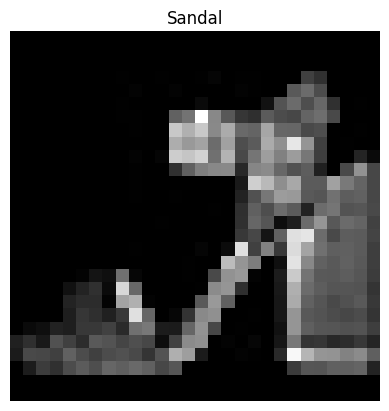

In [17]:
plt.imshow(image[0].squeeze(), cmap="gray")
plt.title(labels_map[label[0].item()])
plt.axis("off")

## One-hot encoding

In [18]:
# transform -> lambda 解釋
# 創造zeros tensor
# scatter_ -> 0:"T-shirt" 將index 0 的數值, 轉換為1 [1, 0, 0, 0, ...] 達成 one-hot encoding 效果

lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)

<function __main__.<lambda>(y)>

In [19]:
# train_datasets and test_dataset
train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_dataset = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y :torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

In [20]:
# check
train_dataset[0][1], test_dataset[0][1]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

# **Model**
1. model_1 **without** training

In [21]:
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

In [22]:
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [23]:
# Module class (建立架構)

class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()

        self.flatten = nn.Flatten()

        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU())

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [24]:
# 依架構 建立模型
model_1 = CNN_1().to(device)
model_1

CNN_1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [25]:
# 創造隨機資料, 通過模型
# 隨機資料
X = torch.rand(1, 28, 28).to(device)

# 通過模型 -> logits
logits = model_1(X)

# 轉換成 "加總為一" 的機率
pred_probility = nn.Softmax(dim=1)(logits)

# 取機率中的最大值
train_pred = pred_probility.argmax(dim=1)

#
print(f"預測為: {labels_map[train_pred.item()]}")

預測為: Pullover


In [26]:
# 取模型中 特定層輸出
specific_weight = model_1.linear_stack[0].weight

specific_bias = model_1.linear_stack[0].bias

# **Loss_fn, Optimizer, training_loop and testing_loop**
1. Model_2 training -> prediction
2. Save model_2
3. Use saved model


In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch.optim as optim

In [36]:
# Dataset
train_dataset = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor())

test_dataset = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor())

In [37]:
# DataLoader
train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 64,
    shuffle = True)

In [38]:
# Model structure
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()

        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [39]:
# Build model and check info
model_2 = CNN_2().to(device)
model_2

CNN_2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [40]:
# Loss_fn, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [41]:
# Define -> training loop & testing loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    for batch, (X_train, y_train) in enumerate(dataloader):
        # forward pass
        train_pred = model(X_train)
        loss = loss_fn(train_pred, y_train)

        # backeard pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # process
        if batch % 500 == 0:
            loss, current = loss.item(), batch*len(X_train)
            print(f"Train loss: {loss:.3f} [{current:.3f} / {size:.3f}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.inference_mode():
        for X_test, y_test in dataloader:
            test_prd = model(X_test)
            test_loss = test_loss + loss_fn(test_prd, y_test).item()
            correct = correct + (test_prd.argmax(1) == y_test).type(torch.float).sum().item()

    test_loss = test_loss / size
    correct = correct / size

    print(f"Test result\n Avg loss:{test_loss:.5f} | Accuracy:{(100*correct):.5f}%")

In [42]:
# Actual train and test
epochs = 10

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}\n============================")
    train_loop(train_dataloader, model_2, loss_fn = loss_fn, optimizer = optimizer)
    test_loop(test_dataloader, model_2, loss_fn = loss_fn)

Epoch: 1
Train loss: 2.291 [0.000 / 60000.000]
Train loss: 1.552 [32000.000 / 60000.000]
Test result
 Avg loss:0.01785 | Accuracy:61.62000%
Epoch: 2
Train loss: 1.073 [0.000 / 60000.000]
Train loss: 0.705 [32000.000 / 60000.000]
Test result
 Avg loss:0.01439 | Accuracy:68.50000%
Epoch: 3
Train loss: 0.904 [0.000 / 60000.000]
Train loss: 0.917 [32000.000 / 60000.000]
Test result
 Avg loss:0.01326 | Accuracy:69.55000%
Epoch: 4
Train loss: 0.806 [0.000 / 60000.000]
Train loss: 0.569 [32000.000 / 60000.000]
Test result
 Avg loss:0.01234 | Accuracy:72.21000%
Epoch: 5
Train loss: 0.887 [0.000 / 60000.000]
Train loss: 0.839 [32000.000 / 60000.000]
Test result
 Avg loss:0.01178 | Accuracy:72.92000%
Epoch: 6
Train loss: 0.653 [0.000 / 60000.000]
Train loss: 0.613 [32000.000 / 60000.000]
Test result
 Avg loss:0.01154 | Accuracy:73.74000%
Epoch: 7
Train loss: 0.553 [0.000 / 60000.000]
Train loss: 0.793 [32000.000 / 60000.000]
Test result
 Avg loss:0.01120 | Accuracy:74.31000%
Epoch: 8
Train loss:

In [43]:
# Save model_2
torch.save(model_2.state_dict(), "data/model_2.pth")

In [51]:
# 模型3 直接套用模型2 並預測
model_3 = CNN_2()
model_3.load_state_dict(torch.load("data/model_2.pth"))

model_3.eval()
X, y = test_dataset[1][0], test_dataset[1][1]

with torch.inference_mode():
    logits = model_3(X)
    probs = nn.Softmax(dim=1)(logits)
    pred = probs.argmax(dim=1)
    print(f"預測: {labels_map[pred.item()]}")
    print(f"真實: {labels_map[y]}")

預測: Pullover
真實: Pullover
